# **Análisis exploratorio de datos - Laptops Pricing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv")

In [18]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Patrones individuales

<Axes: xlabel='CPU_frequency', ylabel='Price'>

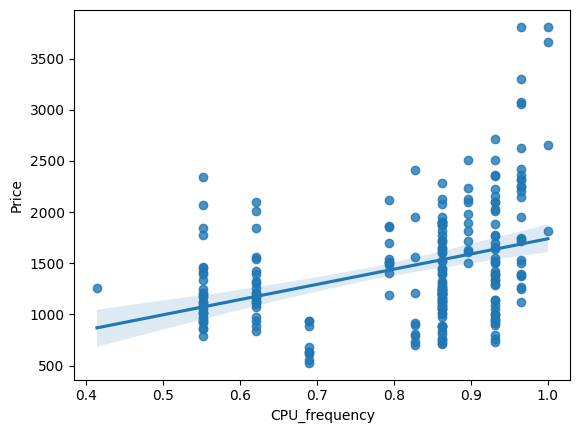

In [19]:
sns.regplot(x = "CPU_frequency", y = "Price", data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

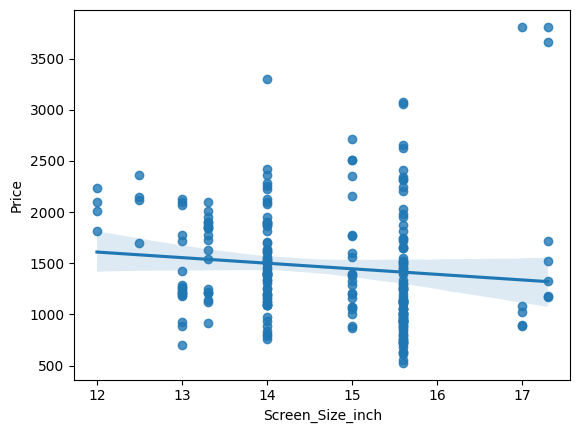

In [22]:
sns.regplot(x = "Screen_Size_inch", y = "Price", data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

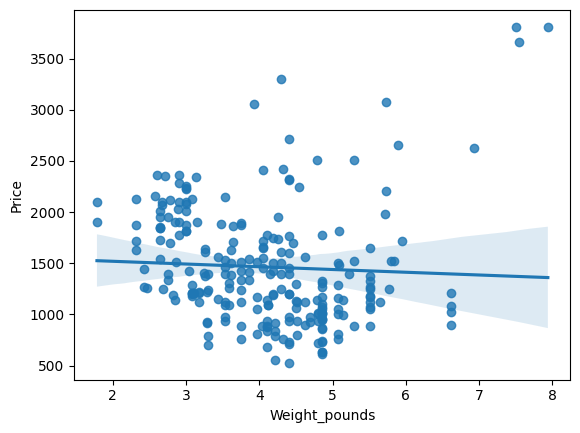

In [24]:
sns.regplot(x = "Weight_pounds", y = "Price", data=df)

In [30]:
for param in ["Weight_pounds","Screen_Size_inch", "CPU_frequency"]:
    print(df[[param, "Price"]].corr().to_markdown())
    print("")

|               |   Weight_pounds |      Price |
|:--------------|----------------:|-----------:|
| Weight_pounds |       1         | -0.0503123 |
| Price         |      -0.0503123 |  1         |

|                  |   Screen_Size_inch |     Price |
|:-----------------|-------------------:|----------:|
| Screen_Size_inch |           1        | -0.110644 |
| Price            |          -0.110644 |  1        |

|               |   CPU_frequency |    Price |
|:--------------|----------------:|---------:|
| CPU_frequency |        1        | 0.366666 |
| Price         |        0.366666 | 1        |



## Variables categóricas

<Axes: xlabel='Category', ylabel='Price'>

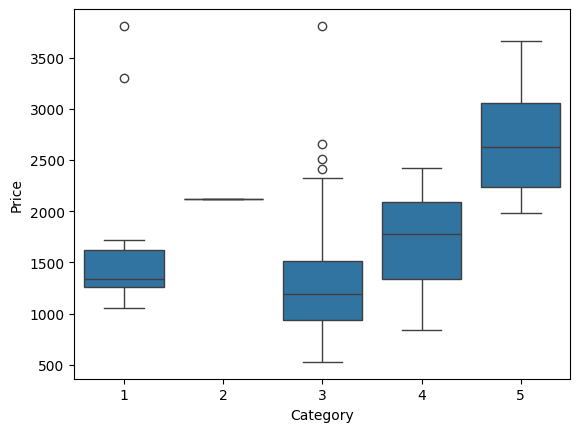

In [31]:
sns.boxplot(x = "Category", y = "Price", data = df)

<Axes: xlabel='GPU', ylabel='Price'>

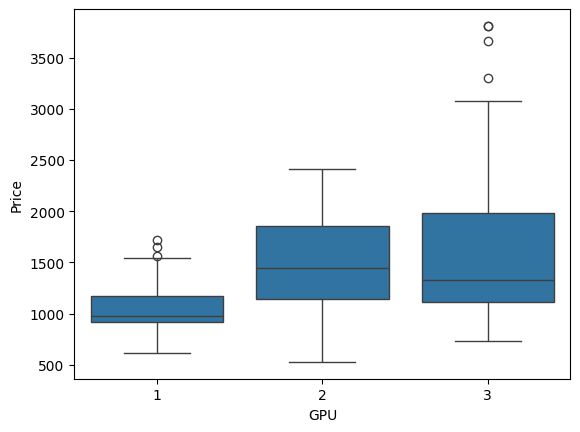

In [32]:
sns.boxplot(x = "GPU", y = "Price", data = df)

<Axes: xlabel='OS', ylabel='Price'>

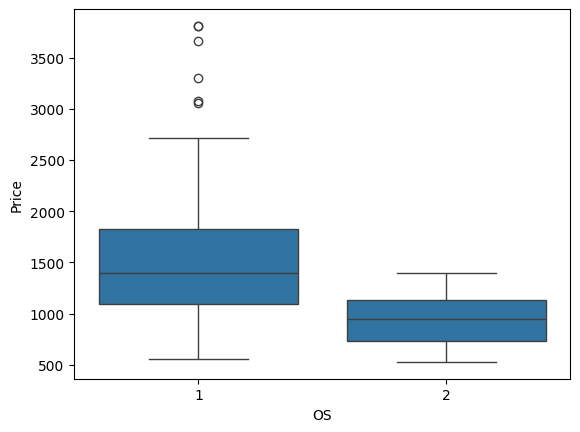

In [33]:
sns.boxplot(x = "OS", y = "Price", data = df)

<Axes: xlabel='CPU_core', ylabel='Price'>

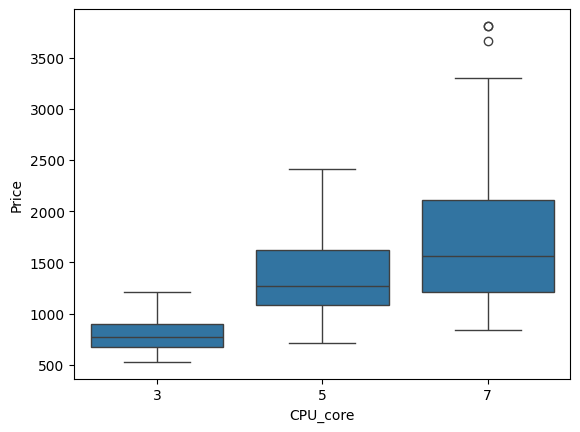

In [34]:
sns.boxplot(x = "CPU_core", y = "Price", data = df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

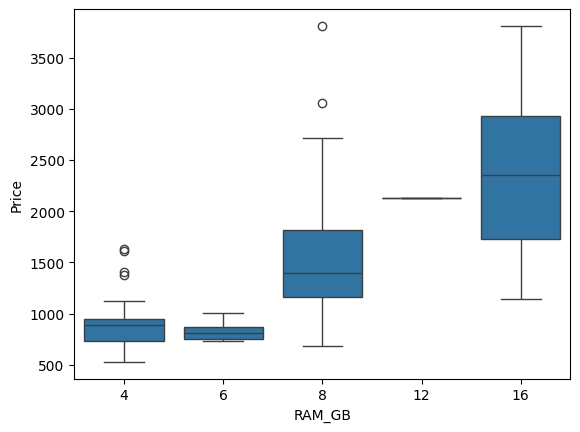

In [35]:
sns.boxplot(x = "RAM_GB", y = "Price", data = df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

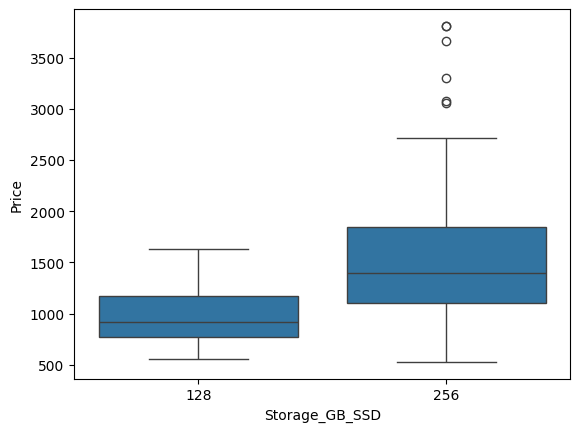

In [38]:
sns.boxplot(x = "Storage_GB_SSD", y = "Price", data = df)

## Análisis descriptivo estadístico

In [39]:
df.describe(include="object")

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


df.describe()

In [41]:
group1 = df[["GPU", "CPU_core", "Price"]]
group1 = group1.groupby(["GPU", "CPU_core"], as_index=False).mean()
group1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [42]:
group1_pivot = group1.pivot(index="GPU", columns="CPU_core")
group1_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

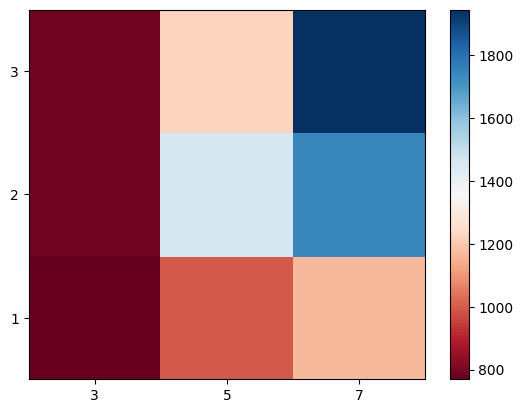

In [44]:
fig, ax = plt.subplots()
im = ax.pcolor(group1_pivot, cmap='RdBu')

#label names
row_labels = group1_pivot.columns.levels[1]
col_labels = group1_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group1_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group1_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [53]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    p_c, p_value = stats.pearsonr(df[param], df["Price"])
    print(param)
    print("Coeficiente: {:.6f}, p_value: {:.6f}".format(p_c, p_value))
    print("")

RAM_GB
Coeficiente: 0.549297, p_value: 0.000000

CPU_frequency
Coeficiente: 0.366666, p_value: 0.000000

Storage_GB_SSD
Coeficiente: 0.243421, p_value: 0.000149

Screen_Size_inch
Coeficiente: -0.110644, p_value: 0.088534

Weight_pounds
Coeficiente: -0.050312, p_value: 0.439769

CPU_core
Coeficiente: 0.459398, p_value: 0.000000

OS
Coeficiente: -0.221730, p_value: 0.000570

GPU
Coeficiente: 0.288298, p_value: 0.000006

Category
Coeficiente: 0.286243, p_value: 0.000007

